## New dataset 

- InceptionV3 with checkpoints for best
- test using freeze and unfreeze

In [1]:
from PIL import Image
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# # Dictionary to store the count of images in each subfolder
# folder_counts = {}

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     if filenames:  # If the folder contains images
#         folder_name = os.path.basename(dirname)  # Extract folder name
#         folder_counts[folder_name] = len(filenames)

# # Print the total count for each subfolder
# for folder, count in folder_counts.items():
#     print(f"Folder: {folder}, Total images: {count}")

# # Print the grand total
# total_images = sum(folder_counts.values())
# print(f"\nTotal images in dataset: {total_images}")

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Folder: Open_Eyes, Total images: 2204
Folder: Closed_Eyes, Total images: 2029
Folder: Yawn, Total images: 2150
Folder: No_yawn, Total images: 2165

Total images in dataset: 8548


In [12]:
import os

def count_images_in_subfolders(base_path):
    """
    Count the number of images in each subfolder within the base_path.
    Returns a dictionary with subfolder names as keys and image counts as values.
    """
    folder_counts = {}
    for dirname, _, filenames in os.walk(base_path):
        if filenames:  # Only consider directories that contain files
            folder_name = os.path.basename(dirname)
            folder_counts[folder_name] = len(filenames)
    return folder_counts

# Define the paths for the train, validation, and test datasets
dataset_paths = {
    "train": "/kaggle/input/drowsiness-dataset/Dataset/Train",
    "val": "/kaggle/input/drowsiness-dataset/Dataset/Val",
    "test": "/kaggle/input/drowsiness-dataset/Dataset/Test"
}

# Loop over each dataset and print out counts per subfolder along with a grand total.
for ds_name, ds_path in dataset_paths.items():
    print(f"\nDataset: {ds_name.upper()}")
    folder_counts = count_images_in_subfolders(ds_path)
    for folder, count in folder_counts.items():
        print(f"Folder: {folder}, Total images: {count}")
    total_images = sum(folder_counts.values())
    print(f"\nTotal images in {ds_name} dataset: {total_images}")



Dataset: TRAIN
Folder: Open_Eyes, Total images: 2204
Folder: Closed_Eyes, Total images: 2029
Folder: Yawn, Total images: 2150
Folder: No_yawn, Total images: 2165

Total images in train dataset: 8548

Dataset: VAL
Folder: Open_Eyes, Total images: 336
Folder: Closed_Eyes, Total images: 336
Folder: Yawn, Total images: 427
Folder: No_yawn, Total images: 455

Total images in val dataset: 1554

Dataset: TEST
Folder: Open_Eyes, Total images: 186
Folder: Closed_Eyes, Total images: 361
Folder: Yawn, Total images: 448
Folder: No_yawn, Total images: 469

Total images in test dataset: 1464


In [13]:
# # Path to the image
# image_path = "/kaggle/input/drowsiness-dataset/Dataset/Val/Open_Eyes/_197.jpg"

# # Open the image
# img = Image.open(image_path)

# # Get the size
# width, height = img.size
# print(f"Image size: {width}x{height}")


Image size: 556x575


In [5]:
# # Define the main dataset directory
# input_base_dir = "/kaggle/input/drowsiness-dataset/Dataset/"
# output_base_dir = "/kaggle/working/processed_dataset/"

# # Ensure the output base directory exists
# os.makedirs(output_base_dir, exist_ok=True)

# # Function to process images recursively
# def process_images(input_dir, output_dir):
#     # Ensure output directory exists
#     os.makedirs(output_dir, exist_ok=True)
    
#     for root, _, files in os.walk(input_dir):
#         # Create corresponding output directory structure
#         relative_path = os.path.relpath(root, input_base_dir)
#         new_output_dir = os.path.join(output_base_dir, relative_path)
#         os.makedirs(new_output_dir, exist_ok=True)
        
#         for filename in files:
#             if filename.lower().endswith((".png", ".jpg", ".jpeg")):  # Process only image files
#                 img_path = os.path.join(root, filename)
#                 #print(f"Processing: {img_path}")  # Debugging output
                
#                 # Open the image
#                 img = Image.open(img_path).convert("RGB")  # Convert PNG to RGB if needed
                
#                 # Resize to 299x299 for InceptionV3
#                 img = img.resize((299, 299))
                
#                 # Define the output path, ensuring the file is saved as .jpg
#                 output_path = os.path.join(new_output_dir, os.path.splitext(filename)[0] + ".jpg")
                
#                 # Save as JPEG with high quality
#                 img.save(output_path, "JPEG", quality=95)

# # Process all train, validate, and test directories
# process_images(input_base_dir, output_base_dir)

# print("All images have been converted and resized successfully!")


All images have been converted and resized successfully!


In [6]:
# # Dictionary to store the count of images in each subfolder
# folder_counts = {}

# for dirname, _, filenames in os.walk('/kaggle/working/processed_dataset/'):
#     if filenames:  # If the folder contains images
#         folder_name = os.path.basename(dirname)  # Extract folder name
#         folder_counts[folder_name] = len(filenames)

# # Print the total count for each subfolder
# for folder, count in folder_counts.items():
#     print(f"Folder: {folder}, Total images: {count}")

# # Print the grand total
# total_images = sum(folder_counts.values())
# print(f"\nTotal images in dataset: {total_images}")

Folder: Yawn, Total images: 427
Folder: Closed_Eyes, Total images: 336
Folder: No_yawn, Total images: 455
Folder: Open_Eyes, Total images: 336

Total images in dataset: 1554


In [17]:
# # Path to the image
# image_path = "/kaggle/working/processed_dataset/Val/Open_Eyes/_197.jpg"

# # Open the image
# img = Image.open(image_path)

# # Get the size
# width, height = img.size
# print(f"Image size: {width}x{height}")

In [14]:
dataset_dir = "/kaggle/input/drowsiness-dataset/Dataset/"
batch_size = 32
img_size = (299, 299)  # Change to (224, 224) if needed

In [15]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# No augmentation for validation & testing (only rescaling)
test_val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_dir + "/Train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load validation data
val_generator = test_val_datagen.flow_from_directory(
    dataset_dir + "/Val",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data (shuffle=False to keep order)
test_generator = test_val_datagen.flow_from_directory(
    dataset_dir + "/Test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # 🔹 Important: Keeps the order for predictions
)


Found 8548 images belonging to 4 classes.
Found 1554 images belonging to 4 classes.
Found 1464 images belonging to 4 classes.


In [18]:
# Load InceptionV3 without the top classification layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional base (so it doesn't train initially)
base_model.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps into a single vector
x = Dense(512, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output_layer = Dense(train_generator.num_classes, activation='softmax')(
    x
)  # Output layer for multi-class classification

# Define the model
model = Model(inputs=base_model.input, outputs=output_layer)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,853,924 (87.18 MB)

 Trainable params: 12,166,020 (46.41 MB)

 Non-trainable params: 10,687,904 (40.77 MB)

In [20]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a callback to save the best model based on val_accuracy
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',      # Path where the best model will be saved
    monitor='val_accuracy',        # Metric to monitor
    verbose=1,                     # Verbosity mode: 1 = progress messages
    save_best_only=True,           # Only save when the monitored metric improves
    mode='max'                     # We want to maximize val_accuracy
)

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,  # Change based on performance
    callbacks=[early_stopping,checkpoint_callback]
)


Epoch 1/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.7530 - loss: 0.6370
Epoch 1: val_accuracy improved from -inf to 0.90605, saving model to best_model.keras
268/268 ━━━━━━━━━━━━━━━━━━━━ 217s 791ms/step - accuracy: 0.7534 - loss: 0.6362 - val_accuracy: 0.9060 - val_loss: 0.2874
Epoch 2/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - accuracy: 0.9237 - loss: 0.2181
Epoch 2: val_accuracy improved from 0.90605 to 0.92278, saving model to best_model.keras
268/268 ━━━━━━━━━━━━━━━━━━━━ 218s 796ms/step - accuracy: 0.9237 - loss: 0.2180 - val_accuracy: 0.9228 - val_loss: 0.2290
Epoch 3/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 700ms/step - accuracy: 0.9356 - loss: 0.1833
Epoch 3: val_accuracy improved from 0.92278 to 0.92535, saving model to best_model.keras
268/268 ━━━━━━━━━━━━━━━━━━━━ 201s 729ms/step - accuracy: 0.9356 - loss: 0.1833 - val_accuracy: 0.9254 - val_loss: 0.2031
Epoch 4/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - accuracy: 0.9439 - loss: 0.1604
Epoch 4: val_accu

In [24]:
import matplotlib.pyplot as plt

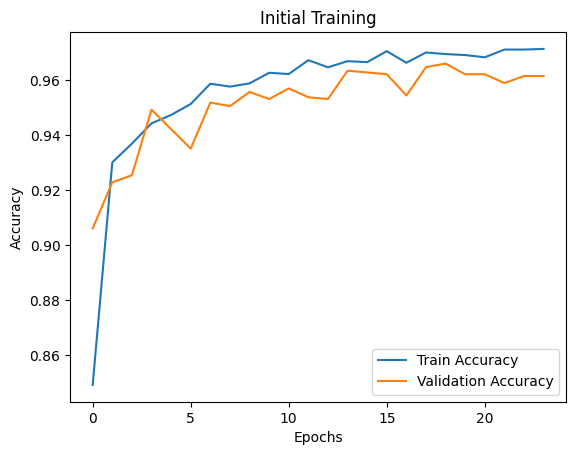

In [25]:
# Plot training history
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history, 'Initial Training')

In [27]:
# test_loss, test_acc = model.evaluate(test_generator)
# print(f"Test Accuracy: {test_acc * 100:.2f}%")

from tensorflow.keras.models import load_model

# Load the best model saved during training
best_model = load_model('best_model.keras')

# Evaluate the best model on your test data
test_loss, test_accuracy = best_model.evaluate(test_generator, verbose=1)
print("Test Accuracy of the best model: {:.2f}%".format(test_accuracy * 100))


46/46 ━━━━━━━━━━━━━━━━━━━━ 28s 455ms/step - accuracy: 0.8820 - loss: 0.2516
Test Accuracy of the best model: 92.62%


In [28]:
# Save the model to the working directory
best_model.save("/kaggle/working/last_trained_model_No_freeze(for new dataset_92.62%).h5")

In [29]:
# Unfreeze some layers of InceptionV3 (fine-tune from a certain layer)
base_model.trainable = True

# Optional: Fine-tune from a specific layer onwards
for layer in base_model.layers[:249]:  # 🔹 Keep first 249 layers frozen
    layer.trainable = False


In [30]:
# Recompile with a lower learning rate (fine-tuning requires small LR)
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # 🔹 Reduce learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a callback to save the best model based on val_accuracy
checkpoint_callback = ModelCheckpoint(
    filepath='best_model_after_freeze.keras',      # Path where the best model will be saved
    monitor='val_accuracy',        # Metric to monitor
    verbose=1,                     # Verbosity mode: 1 = progress messages
    save_best_only=True,           # Only save when the monitored metric improves
    mode='max'                     # We want to maximize val_accuracy
)

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,  # 🔹 Fine-tune for fewer epochs
    callbacks=[early_stopping,checkpoint_callback]
)


Epoch 1/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 728ms/step - accuracy: 0.9241 - loss: 0.1970
Epoch 1: val_accuracy improved from -inf to 0.96782, saving model to best_model_after_freeze.keras
268/268 ━━━━━━━━━━━━━━━━━━━━ 244s 797ms/step - accuracy: 0.9242 - loss: 0.1968 - val_accuracy: 0.9678 - val_loss: 0.0854
Epoch 2/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.9696 - loss: 0.0923
Epoch 2: val_accuracy improved from 0.96782 to 0.97812, saving model to best_model_after_freeze.keras
268/268 ━━━━━━━━━━━━━━━━━━━━ 213s 776ms/step - accuracy: 0.9696 - loss: 0.0922 - val_accuracy: 0.9781 - val_loss: 0.0614
Epoch 3/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 702ms/step - accuracy: 0.9760 - loss: 0.0722
Epoch 3: val_accuracy improved from 0.97812 to 0.98198, saving model to best_model_after_freeze.keras
268/268 ━━━━━━━━━━━━━━━━━━━━ 203s 740ms/step - accuracy: 0.9760 - loss: 0.0722 - val_accuracy: 0.9820 - val_loss: 0.0511
Epoch 4/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 

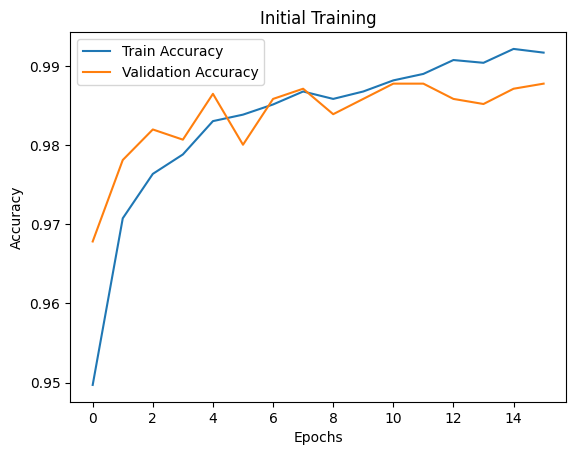

In [32]:
# Plot training history
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history_finetune, 'Initial Training')

In [33]:
# test_loss, test_acc = model.evaluate(test_generator)
# print(f"Test Accuracy: {test_acc * 100:.2f}%")
# Load the best model saved during training
best_model_after_freeze = load_model('best_model_after_freeze.keras')

# Evaluate the best model on your test data
test_loss, test_accuracy = best_model_after_freeze.evaluate(test_generator, verbose=1)
print("Test Accuracy of the best model after freeze: {:.2f}%".format(test_accuracy * 100))


46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.9661 - loss: 0.0919
Test Accuracy of the best model after freeze: 96.99%


In [34]:
# Save the model to the working directory
best_model_after_freeze.save("/kaggle/working/last_trained_model_after_freeze(for new dataset_96.99%).h5")